## **Práctica 1: Reglas de asociación (Algoritmo Apriori)**

Nombre:

Nro. Cuenta:

Email:

**Objetivo**

Obtener reglas de asociación a partir de datos obtenidos de una plataforma de películas, donde los clientes pueden rentar o comprar este tipo de contenidos. 

**Características**

* Por lo general, existe un patrón en lo que ven los clientes. Por ejemplo, superhéroes en la categoría para niños.
* En este sentido, se pueden generar más ganancias, si se puede identificar la relación entre las películas. Esto es, si las películas A y B se rentan juntas, este patrón se puede aprovechar para aumentar las ganancias.
* Las personas que rentan una de estas películas pueden ser empujadas a rentar o comprar la otra, a través de campañas o sugerencias dentro de la plataforma.
* En este sentido, cada vez es común familiarizarse con los motores de recomendación en Netflix, Amazon, por nombrar los más destacados.

#### **1) Importar las bibliotecas necesarias**


In [1]:
!pip install apyori  # pip es un administrador de paquetes de Python. Se instala el paquete Apyori

In [2]:
import pandas as pd                 # Para la manipulación y análisis de los datos
import numpy as np                  # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt     # Para la generación de gráficas a partir de los datos
from apyori import apriori

#### **2) Importar los datos**

Fuente de datos: movies.csv

In [4]:
DatosMovies = pd.read_csv('Datos/movies.csv')

In [4]:
DatosMovies

,The Revenant,13 Hours,Allied,Zootopia,Jigsaw,Achorman,Grinch,Fast and Furious,Ghostbusters,Wolverine,Mad Max,John Wick,La La Land,The Good Dunosaur,Ninja Turtles,The Good Dunosaur Bad Moms,2 Guns,Inside Out,Valerian,Spiderman 3
0,Beirut,Martian,Get Out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Deadpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,X-Men,Allied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ninja Turtles,Moana,Ghost in the Shell,Ralph Breaks the Internet,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mad Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,Big Sick,Looper,Hulk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7455,Beirut,Intern,Get Out,Hotel Transylvania,Mamma Mia,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7456,Captain America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7457,Green Lantern,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observaciones:**

1) Se observa que el encabezado es la primera transacción.

2) NaN indica que esa película no fue rentada o comprada en esa transacción.

In [6]:
DatosMovies = pd.read_csv('Datos/movies.csv', header=None)
DatosMovies

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,The Revenant,13 Hours,Allied,Zootopia,Jigsaw,Achorman,Grinch,Fast and Furious,Ghostbusters,Wolverine,Mad Max,John Wick,La La Land,The Good Dunosaur,Ninja Turtles,The Good Dunosaur Bad Moms,2 Guns,Inside Out,Valerian,Spiderman 3
1,Beirut,Martian,Get Out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Deadpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,X-Men,Allied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ninja Turtles,Moana,Ghost in the Shell,Ralph Breaks the Internet,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7455,Big Sick,Looper,Hulk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7456,Beirut,Intern,Get Out,Hotel Transylvania,Mamma Mia,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7457,Captain America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7458,Green Lantern,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **3) Procesamiento de los datos**

**Exploración**

Antes de ejecutar el algoritmo es recomendable observar la distribución de la frecuencia de los elementos.

In [7]:
#Se incluyen todas las transacciones en una sola lista
Transacciones = DatosMovies.values.reshape(-1).tolist() #-1 significa 'dimensión no conocida'

In [8]:
#Se crea una matriz (dataframe) usando la lista y se incluye una columna 'Frecuencia'
ListaM = pd.DataFrame(Transacciones)
ListaM

,0
0,The Revenant
1,13 Hours
2,Allied
3,Zootopia
4,Jigsaw
...,...
149195,NaN
149196,NaN
149197,NaN
149198,NaN


In [9]:
ListaM['Frecuencia'] = 1
ListaM

,0,Frecuencia
0,The Revenant,1
1,13 Hours,1
2,Allied,1
3,Zootopia,1
4,Jigsaw,1
...,...,...
149195,NaN,1
149196,NaN,1
149197,NaN,1
149198,NaN,1


In [10]:
#Se agrupa los elementos
ListaM = ListaM.groupby(by=[0], as_index=False).count().sort_values(by=['Frecuencia'], ascending=True) #Conteo
ListaM['Porcentaje'] = (ListaM['Frecuencia'] / ListaM['Frecuencia'].sum()) #Porcentaje
ListaM = ListaM.rename(columns={0 : 'Item'})
ListaM

,Item,Frecuencia,Porcentaje
106,Vampire in Brooklyn,3,0.000102
63,Lady Bird,5,0.000171
34,Finding Dory,7,0.000239
11,Bad Moms,14,0.000477
118,water spray,29,0.000989
...,...,...,...
25,Coco,1229,0.041915
44,Hotel Transylvania,1280,0.043655
103,Tomb Rider,1305,0.044507
37,Get Out,1346,0.045906


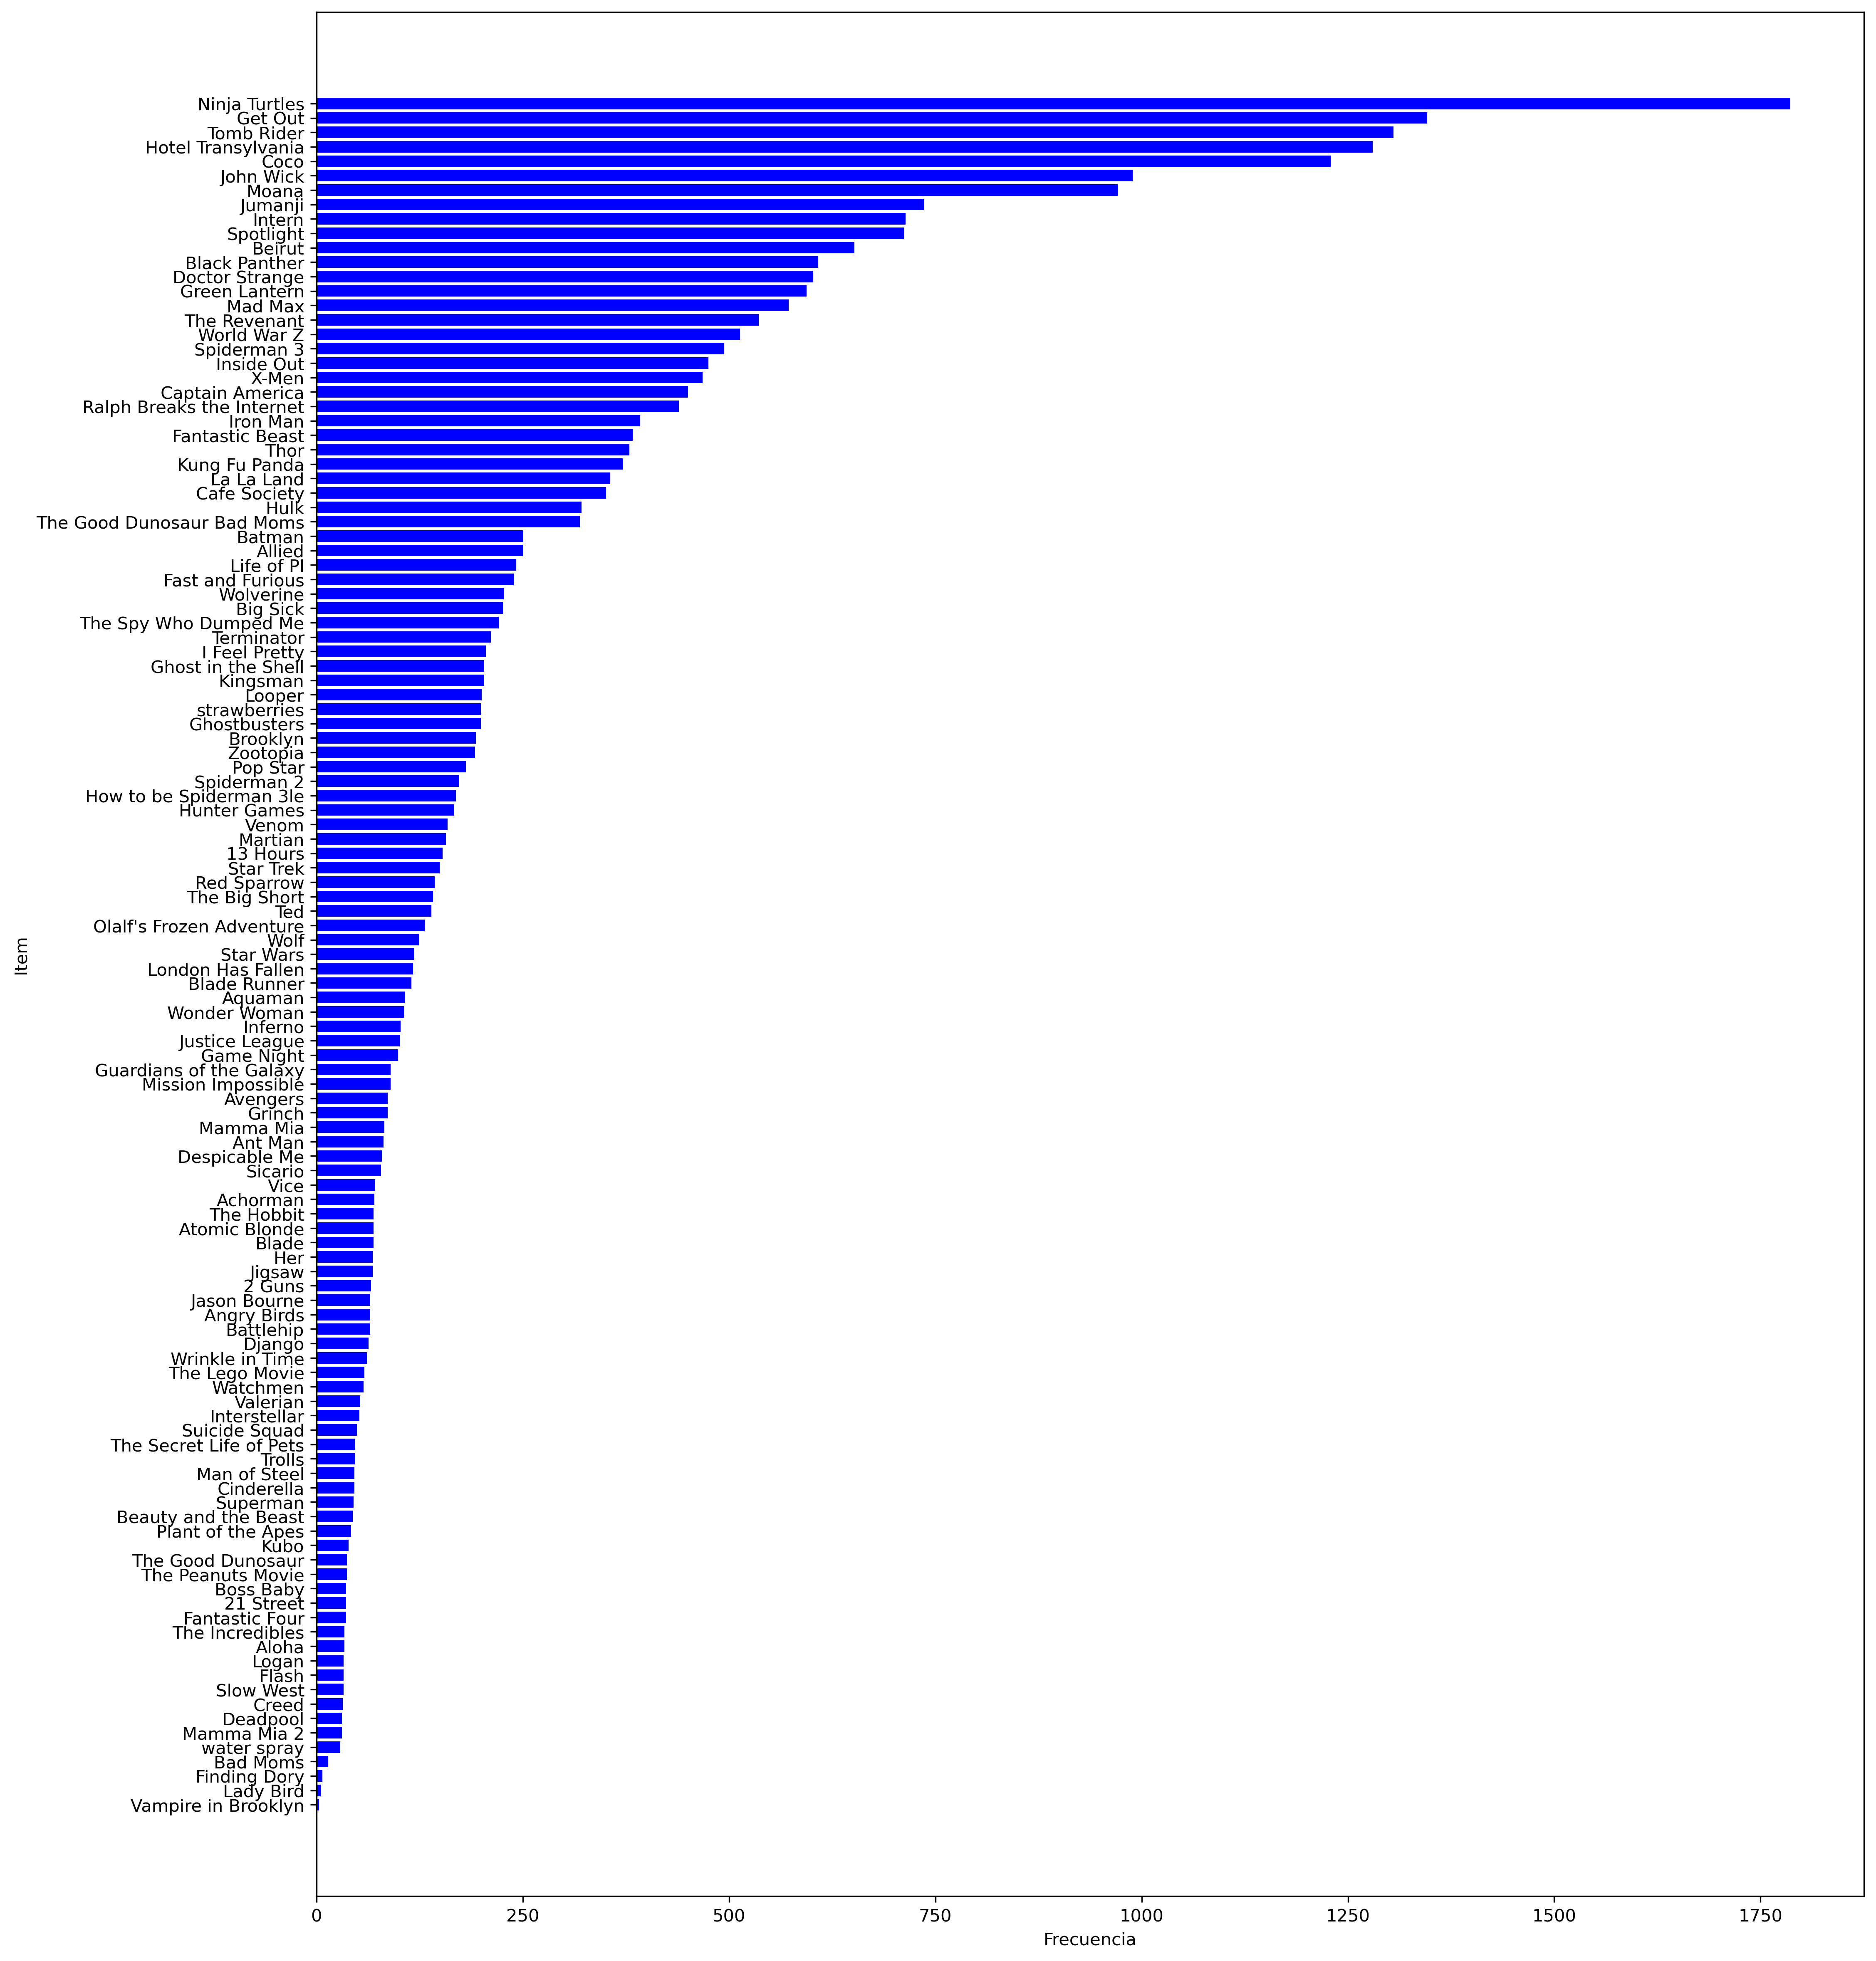

In [10]:
# Se genera un gráfico de barras
plt.figure(figsize=(16,20), dpi=300)
plt.ylabel('Item')
plt.xlabel('Frecuencia')
plt.barh(ListaM['Item'], width=ListaM['Frecuencia'], color='blue')
plt.show()

**Preparación**

La función Apriori de Python requiere que el conjunto de datos tenga la forma de una lista de listas, donde cada transacción es una lista interna dentro de una gran lista. 

Los datos actuales están en un dataframe de Pandas, por lo que, se requiere convertir en una lista.

In [11]:
#Se crea una lista de listas a partir del dataframe y se remueven los 'NaN'
#level=0 especifica desde el primer índice
MoviesLista = DatosMovies.stack().groupby(level=0).apply(list).tolist()
MoviesLista 

[['The Revenant',
  '13 Hours',
  'Allied',
  'Zootopia',
  'Jigsaw',
  'Achorman',
  'Grinch',
  'Fast and Furious',
  'Ghostbusters',
  'Wolverine',
  'Mad Max',
  'John Wick',
  'La La Land',
  'The Good Dunosaur',
  'Ninja Turtles',
  'The Good Dunosaur Bad Moms',
  '2 Guns',
  'Inside Out',
  'Valerian',
  'Spiderman 3'],
 ['Beirut', 'Martian', 'Get Out'],
 ['Deadpool'],
 ['X-Men', 'Allied'],
 ['Ninja Turtles',
  'Moana',
  'Ghost in the Shell',
  'Ralph Breaks the Internet',
  'John Wick'],
 ['Mad Max'],
 ['The Spy Who Dumped Me', 'Hotel Transylvania'],
 ['Thor', 'London Has Fallen', 'The Lego Movie'],
 ['Intern', 'Tomb Rider', 'John Wick'],
 ['Hotel Transylvania'],
 ['Get Out', 'Suicide Squad'],
 ['Doctor Strange'],
 ['X-Men', 'Beirut', 'Ninja Turtles', 'Get Out', 'Fantastic Beast'],
 ['Tomb Rider', 'Cafe Society', 'Doctor Strange'],
 ['Ninja Turtles', 'The Good Dunosaur Bad Moms'],
 ['Ninja Turtles'],
 ['The Revenant',
  'Coco',
  'Captain America',
  'La La Land',
  'Spiderman

#### **4) Aplicación del algoritmo**

**Configuración 1**

Obtener reglas para aquellas películas que se hayan rentado al menos 10 veces en un día (70 veces en una semana):

i) El soporte mínimo se calcula de 70/7460 = 0.00938 (1%).

ii) La confianza mínima para las reglas de 30%

iii) La elevación de 2.

**Observación:** Estos valores se eligen arbitrariamente, por lo que, se recomienda probar valores y analizar la diferencia en las reglas.

In [12]:
ReglasC1 = apriori(MoviesLista, 
                   min_support=0.01, 
                   min_confidence=0.3, 
                   min_lift=2)

Se convierte las reglas encontradas por la clase apriori en una lista, puesto que es más fácil ver los resultados.

In [13]:
ResultadosC1 = list(ReglasC1)
print(len(ResultadosC1)) #Total de reglas encontradas 

9


In [14]:
ResultadosC1

[RelationRecord(items=frozenset({'Kung Fu Panda', 'Jumanji'}), support=0.0160857908847185, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Kung Fu Panda'}), items_add=frozenset({'Jumanji'}), confidence=0.3234501347708895, lift=3.2784483768897226)]),
 RelationRecord(items=frozenset({'Tomb Rider', 'Jumanji'}), support=0.03941018766756032, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Jumanji'}), items_add=frozenset({'Tomb Rider'}), confidence=0.3994565217391304, lift=2.283483258370814)]),
 RelationRecord(items=frozenset({'Moana', 'Thor'}), support=0.015281501340482574, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Thor'}), items_add=frozenset({'Moana'}), confidence=0.3007915567282322, lift=2.3109217437617016)]),
 RelationRecord(items=frozenset({'Tomb Rider', 'Terminator'}), support=0.01032171581769437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Terminator'}), items_add=frozenset({'Tomb Rider'}), confidence=0.36492890995260663, lift

In [14]:
pd.DataFrame(ResultadosC1)

,items,support,ordered_statistics
0,"(Jumanji, Kung Fu Panda)",0.016086,"[((Kung Fu Panda), (Jumanji), 0.32345013477088..."
1,"(Tomb Rider, Jumanji)",0.039410,"[((Jumanji), (Tomb Rider), 0.3994565217391304,..."
2,"(Thor, Moana)",0.015282,"[((Thor), (Moana), 0.3007915567282322, 2.31092..."
3,"(Tomb Rider, Terminator)",0.010322,"[((Terminator), (Tomb Rider), 0.36492890995260..."
4,"(Ninja Turtles, Jumanji, Get Out)",0.010188,"[((Jumanji, Get Out), (Ninja Turtles), 0.50666..."
5,"(Ninja Turtles, Moana, Intern)",0.011126,"[((Ninja Turtles, Intern), (Moana), 0.30970149..."
6,"(Ninja Turtles, Jumanji, Moana)",0.011126,"[((Jumanji, Moana), (Ninja Turtles), 0.5030303..."
7,"(Tomb Rider, Ninja Turtles, Jumanji)",0.017158,"[((Ninja Turtles, Jumanji), (Tomb Rider), 0.41..."
8,"(Ninja Turtles, Tomb Rider, Spiderman 3)",0.010322,"[((Ninja Turtles, Spiderman 3), (Tomb Rider), ..."


Son 9 reglas. A manera de ejemplo se imprime la primera regla:

In [15]:
print(ResultadosC1[0])

RelationRecord(items=frozenset({'Jumanji', 'Kung Fu Panda'}), support=0.0160857908847185, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Kung Fu Panda'}), items_add=frozenset({'Jumanji'}), confidence=0.3234501347708895, lift=3.2784483768897226)])


La primera regla contiene dos elementos: **'Kung Fu Panda'** y **'Jumanji'** que se vieron juntos.

* Esto tiene sentido, las personas que ven películas familiares, en este caso de corte infantil, suelen ver también más películas del mismo tipo, como Kung Fu Panda (2016) y Jumanji (2017).

* El soporte es de 0.016 (1.6%), la confianza de 0.32 (32%) y elevación de 3.27, esto representa que existe 3 veces más posibilidades de que los que vean Kung Fu Panda miren también Jumanji, o viceversa.

In [16]:
print(ResultadosC1[1])
print(ResultadosC1[2])

RelationRecord(items=frozenset({'Tomb Rider', 'Jumanji'}), support=0.03941018766756032, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Jumanji'}), items_add=frozenset({'Tomb Rider'}), confidence=0.3994565217391304, lift=2.283483258370814)])
RelationRecord(items=frozenset({'Thor', 'Moana'}), support=0.015281501340482574, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Thor'}), items_add=frozenset({'Moana'}), confidence=0.3007915567282322, lift=2.3109217437617016)])


In [17]:
for item in ResultadosC1:
  #El primer índice de la lista
  Emparejar = item[0]
  items = [x for x in Emparejar]
  print("Regla: " + str(item[0]))

  #El segundo índice de la lista
  print("Soporte: " + str(item[1]))

  #El tercer índice de la lista
  print("Confianza: " + str(item[2][0][2]))
  print("Lift: " + str(item[2][0][3])) 
  print("=====================================") 

Regla: frozenset({'Jumanji', 'Kung Fu Panda'})
Soporte: 0.0160857908847185
Confianza: 0.3234501347708895
Lift: 3.2784483768897226
Regla: frozenset({'Tomb Rider', 'Jumanji'})
Soporte: 0.03941018766756032
Confianza: 0.3994565217391304
Lift: 2.283483258370814
Regla: frozenset({'Thor', 'Moana'})
Soporte: 0.015281501340482574
Confianza: 0.3007915567282322
Lift: 2.3109217437617016
Regla: frozenset({'Tomb Rider', 'Terminator'})
Soporte: 0.01032171581769437
Confianza: 0.36492890995260663
Lift: 2.0861070254762035
Regla: frozenset({'Ninja Turtles', 'Jumanji', 'Get Out'})
Soporte: 0.010187667560321715
Confianza: 0.5066666666666666
Lift: 2.1163120567375886
Regla: frozenset({'Ninja Turtles', 'Moana', 'Intern'})
Soporte: 0.011126005361930294
Confianza: 0.30970149253731344
Lift: 2.37937500960696
Regla: frozenset({'Ninja Turtles', 'Jumanji', 'Moana'})
Soporte: 0.011126005361930294
Confianza: 0.5030303030303029
Lift: 2.1011232142251175
Regla: frozenset({'Tomb Rider', 'Ninja Turtles', 'Jumanji'})
Soport

**Configuración 2**

Obtener reglas para aquellas películas que se hayan visto al menos 210 veces a la semana (30 por día):

i) El soporte mínimo se calcula de 210/7460 = 0.028 (2.8%).

ii) La confianza mínima para las reglas de 30%.

iii) La elevación mayor a 1.

In [18]:
ReglasC2 = apriori(MoviesLista, 
                   min_support=0.028, 
                   min_confidence=0.3, 
                   min_lift = 1.1)

In [19]:
ResultadosC2 = list(ReglasC2)
print(len(ResultadosC2))

8


In [20]:
ResultadosC2 

[RelationRecord(items=frozenset({'Beirut', 'Get Out'}), support=0.028954423592493297, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Beirut'}), items_add=frozenset({'Get Out'}), confidence=0.3312883435582822, lift=1.8361151879233173)]),
 RelationRecord(items=frozenset({'Ninja Turtles', 'Coco'}), support=0.05294906166219839, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Coco'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.32166123778501626, lift=1.3435570178478284)]),
 RelationRecord(items=frozenset({'Ninja Turtles', 'Intern'}), support=0.035924932975871314, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Intern'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.3753501400560224, lift=1.5678118951948081)]),
 RelationRecord(items=frozenset({'Ninja Turtles', 'Jumanji'}), support=0.04115281501340483, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Jumanji'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.4171195652173

In [21]:
pd.DataFrame(ResultadosC2)

,items,support,ordered_statistics
0,"(Beirut, Get Out)",0.028954,"[((Beirut), (Get Out), 0.3312883435582822, 1.8..."
1,"(Ninja Turtles, Coco)",0.052949,"[((Coco), (Ninja Turtles), 0.32166123778501626..."
2,"(Ninja Turtles, Intern)",0.035925,"[((Intern), (Ninja Turtles), 0.375350140056022..."
3,"(Ninja Turtles, Jumanji)",0.041153,"[((Jumanji), (Ninja Turtles), 0.41711956521739..."
4,"(Tomb Rider, Jumanji)",0.039410,"[((Jumanji), (Tomb Rider), 0.3994565217391304,..."
5,"(Ninja Turtles, Moana)",0.048257,"[((Moana), (Ninja Turtles), 0.3707518022657054..."
6,"(Ninja Turtles, Spotlight)",0.033914,"[((Spotlight), (Ninja Turtles), 0.355337078651..."
7,"(Ninja Turtles, Tomb Rider)",0.060054,"[((Tomb Rider), (Ninja Turtles), 0.34329501915..."


In [22]:
print(ResultadosC2[0])

RelationRecord(items=frozenset({'Beirut', 'Get Out'}), support=0.028954423592493297, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Beirut'}), items_add=frozenset({'Get Out'}), confidence=0.3312883435582822, lift=1.8361151879233173)])


La primera regla contiene dos elementos: **'Get Out'** y **'Beirut'** que se vieron juntos.

Esto también tiene sentido, las personas que ven películas de espionaje, como Beirut (2018), tienen gustos afines con películas de terror, como Get Out (2017).

El soporte es de 0.028 (2.8%), la confianza de 0.33 (33%) y una elevación de 1.83, esto representa que existe casi 2 veces más posibilidades de que los que vean Get Out miren también Beirut, o viceversa.

In [23]:
print(ResultadosC2[1])
print(ResultadosC2[2])

RelationRecord(items=frozenset({'Ninja Turtles', 'Coco'}), support=0.05294906166219839, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Coco'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.32166123778501626, lift=1.3435570178478284)])
RelationRecord(items=frozenset({'Ninja Turtles', 'Intern'}), support=0.035924932975871314, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Intern'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.3753501400560224, lift=1.5678118951948081)])


In [24]:
for item in ResultadosC2:
  #El primer índice de la lista
  Emparejar = item[0]
  items = [x for x in Emparejar]
  print("Regla: " + str(item[0]))

  #El segundo índice de la lista
  print("Soporte: " + str(item[1]))

  #El tercer índice de la lista
  print("Confianza: " + str(item[2][0][2]))
  print("Lift: " + str(item[2][0][3])) 
  print("=====================================") 

Regla: frozenset({'Beirut', 'Get Out'})
Soporte: 0.028954423592493297
Confianza: 0.3312883435582822
Lift: 1.8361151879233173
Regla: frozenset({'Ninja Turtles', 'Coco'})
Soporte: 0.05294906166219839
Confianza: 0.32166123778501626
Lift: 1.3435570178478284
Regla: frozenset({'Ninja Turtles', 'Intern'})
Soporte: 0.035924932975871314
Confianza: 0.3753501400560224
Lift: 1.5678118951948081
Regla: frozenset({'Ninja Turtles', 'Jumanji'})
Soporte: 0.04115281501340483
Confianza: 0.4171195652173913
Lift: 1.742279930863236
Regla: frozenset({'Tomb Rider', 'Jumanji'})
Soporte: 0.03941018766756032
Confianza: 0.3994565217391304
Lift: 2.283483258370814
Regla: frozenset({'Ninja Turtles', 'Moana'})
Soporte: 0.04825737265415549
Confianza: 0.3707518022657054
Lift: 1.5486049523528347
Regla: frozenset({'Ninja Turtles', 'Spotlight'})
Soporte: 0.0339142091152815
Confianza: 0.3553370786516854
Lift: 1.4842187047825157
Regla: frozenset({'Ninja Turtles', 'Tomb Rider'})
Soporte: 0.060053619302949064
Confianza: 0.3432